In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import , confusion_matrix, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder



In [2]:
df = pd.read_csv(r"c:\Users\yelam\Downloads\prediabetes_modified_90.csv")
min_values = df.min()
max_values = df.max()
# Assuming 'df' is your dataset and 'min_values' and 'max_values' have been calculated
reversed_df = df * (max_values - min_values) + min_values
means = df.mean()
stds = df.std()
reversed_df = df * stds + means
print(reversed_df)

          Age    gender  smoking_history  sleep duration  physical fitness  \
0   -0.476904  0.848120         1.369281        0.232026          1.204047   
1   -1.111789  0.848120         1.369281        0.232026          0.107436   
2    0.611469  0.848120         1.369281        0.654497          1.615276   
3   -0.023415  0.848120         1.369281        0.232026          1.478200   
4   -0.839696  0.366013         1.369281        0.232026         -1.354712   
..        ...       ...              ...             ...               ...   
607 -0.839696  0.848120         5.366187        0.232026         -1.400404   
608 -0.023415  0.848120         1.369281        0.232026          0.381589   
609 -0.839696  0.366013         4.033885        0.232026          0.929894   
610 -0.567602  0.848120         1.369281        0.232026         -1.491788   
611 -0.386207  0.366013         2.701583        0.232026          0.884202   

     BloodPressure  SkinThickness       bmi   Outcome  
0      

In [3]:
df = df.fillna(0)
df.head()
df.dtypes.unique()
print(df)

          Age  gender  smoking_history  sleep duration  physical fitness  \
0   -0.476515       1                0               0          1.203063   
1   -1.110880       1                0               0          0.107348   
2    0.610969       1                0               1          1.613956   
3   -0.023396       1                0               0          1.476992   
4   -0.839009       0                0               0         -1.353605   
..        ...     ...              ...             ...               ...   
607 -0.839009       1                3               0         -1.399259   
608 -0.023396       1                0               0          0.381277   
609 -0.839009       0                2               0          0.929134   
610 -0.567138       1                0               0         -1.490569   
611 -0.385891       0                1               0          0.883480   

     BloodPressure  SkinThickness       bmi  Outcome  
0        -0.484476       0.05850

In [4]:
100* (df.isnull().sum())/(df.shape[0])
# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,612.0,2.351061e-16,1.000818,-1.110880,-0.748386,-0.295267,0.520346,3.057808
gender,612.0,3.660131e-01,0.482107,0.000000,0.000000,0.000000,1.000000,1.000000
smoking_history,612.0,1.369281e+00,1.332302,0.000000,0.000000,1.000000,3.000000,3.000000
sleep duration,612.0,2.320261e-01,0.422471,0.000000,0.000000,0.000000,0.000000,1.000000
physical fitness,612.0,-9.288140e-17,1.000818,-1.673188,-0.954125,0.061694,0.792170,1.750920
BloodPressure,612.0,2.902544e-17,1.000818,-1.908241,-0.721770,-0.187858,0.701995,2.837643
SkinThickness,612.0,-2.322035e-17,1.000818,-2.273688,-0.764621,-0.078681,0.607258,2.665077
bmi,612.0,7.836868e-17,1.000818,-2.635836,-0.504820,-0.141429,0.897771,2.928485
Outcome,612.0,5.000000e-01,0.500409,0.000000,0.000000,0.500000,1.000000,1.000000


In [6]:
print(df['sleep duration'].dtype)

int64


In [7]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    50.0
1    50.0
Name: count, dtype: float64

In [8]:
df.Outcome.value_counts()

Outcome
0    306
1    306
Name: count, dtype: int64

In [9]:
print(df.dtypes.unique())

[dtype('float64') dtype('int64')]


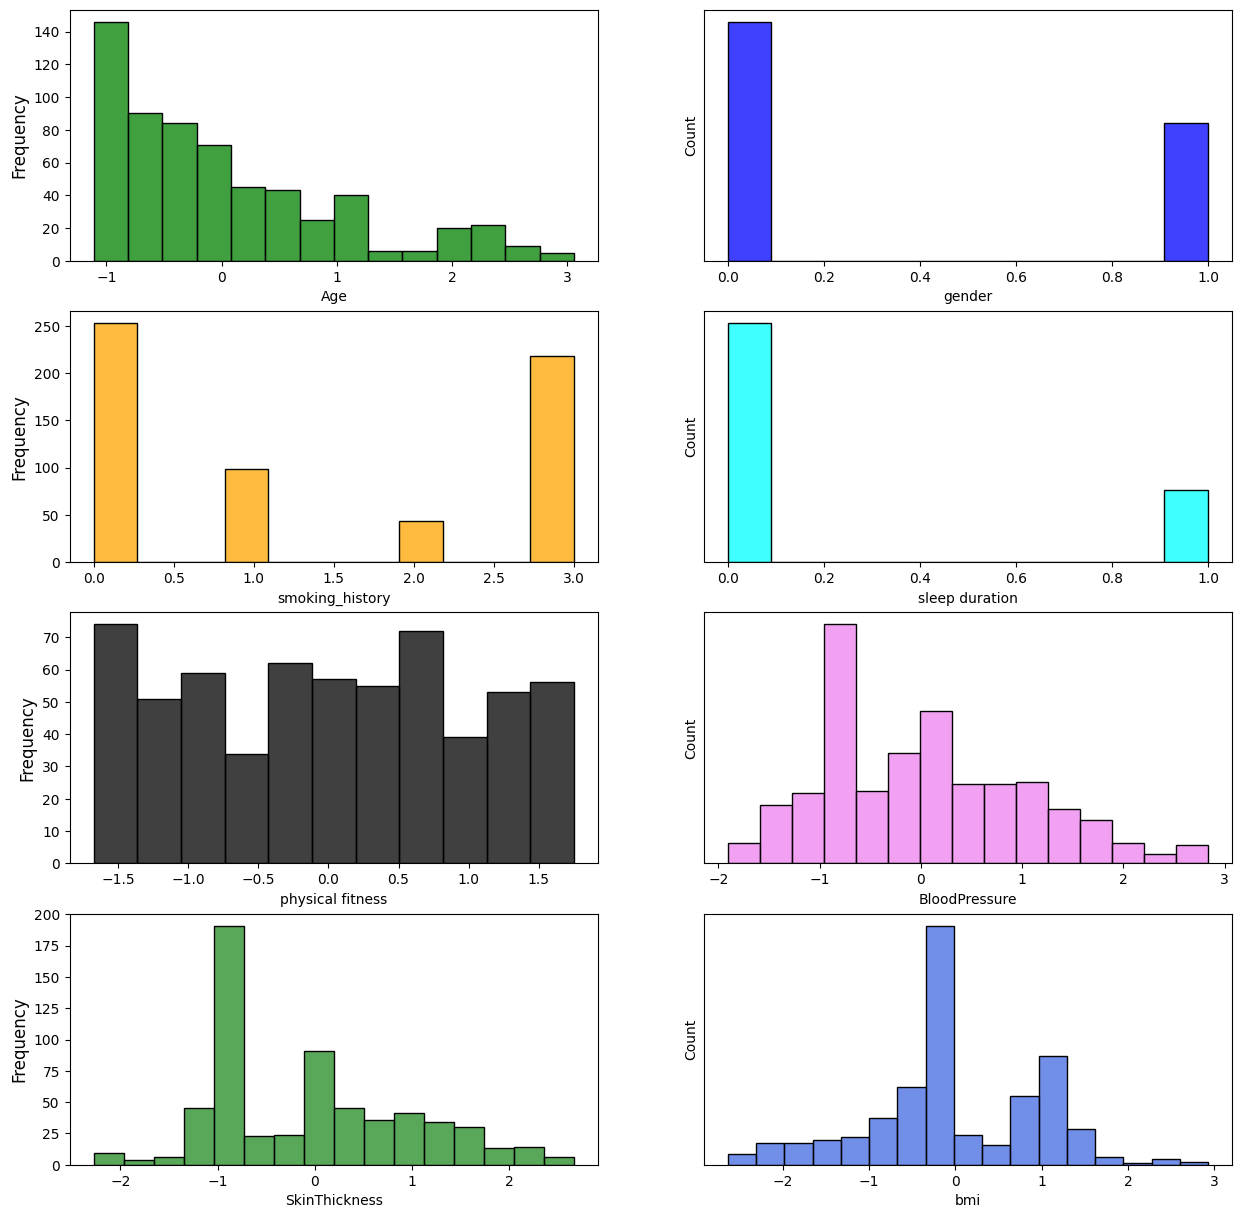

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.histplot(df['Age'], color='green')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,2)
sns.histplot(df['gender'], color='blue')
plt.yticks([])

plt.subplot(4,2,3)
sns.histplot(df['smoking_history'], color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,4)
sns.histplot(df['sleep duration'], color='cyan')
plt.yticks([])

plt.subplot(4,2,5)
sns.histplot(df['physical fitness'],color='black')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,6)
sns.histplot(df['BloodPressure'], color='violet')
plt.yticks([])

plt.subplot(4,2,7)
sns.histplot(df['SkinThickness'], color='forestgreen')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,8)
sns.histplot(df['bmi'], color='royalblue')
plt.yticks([])
plt.show()

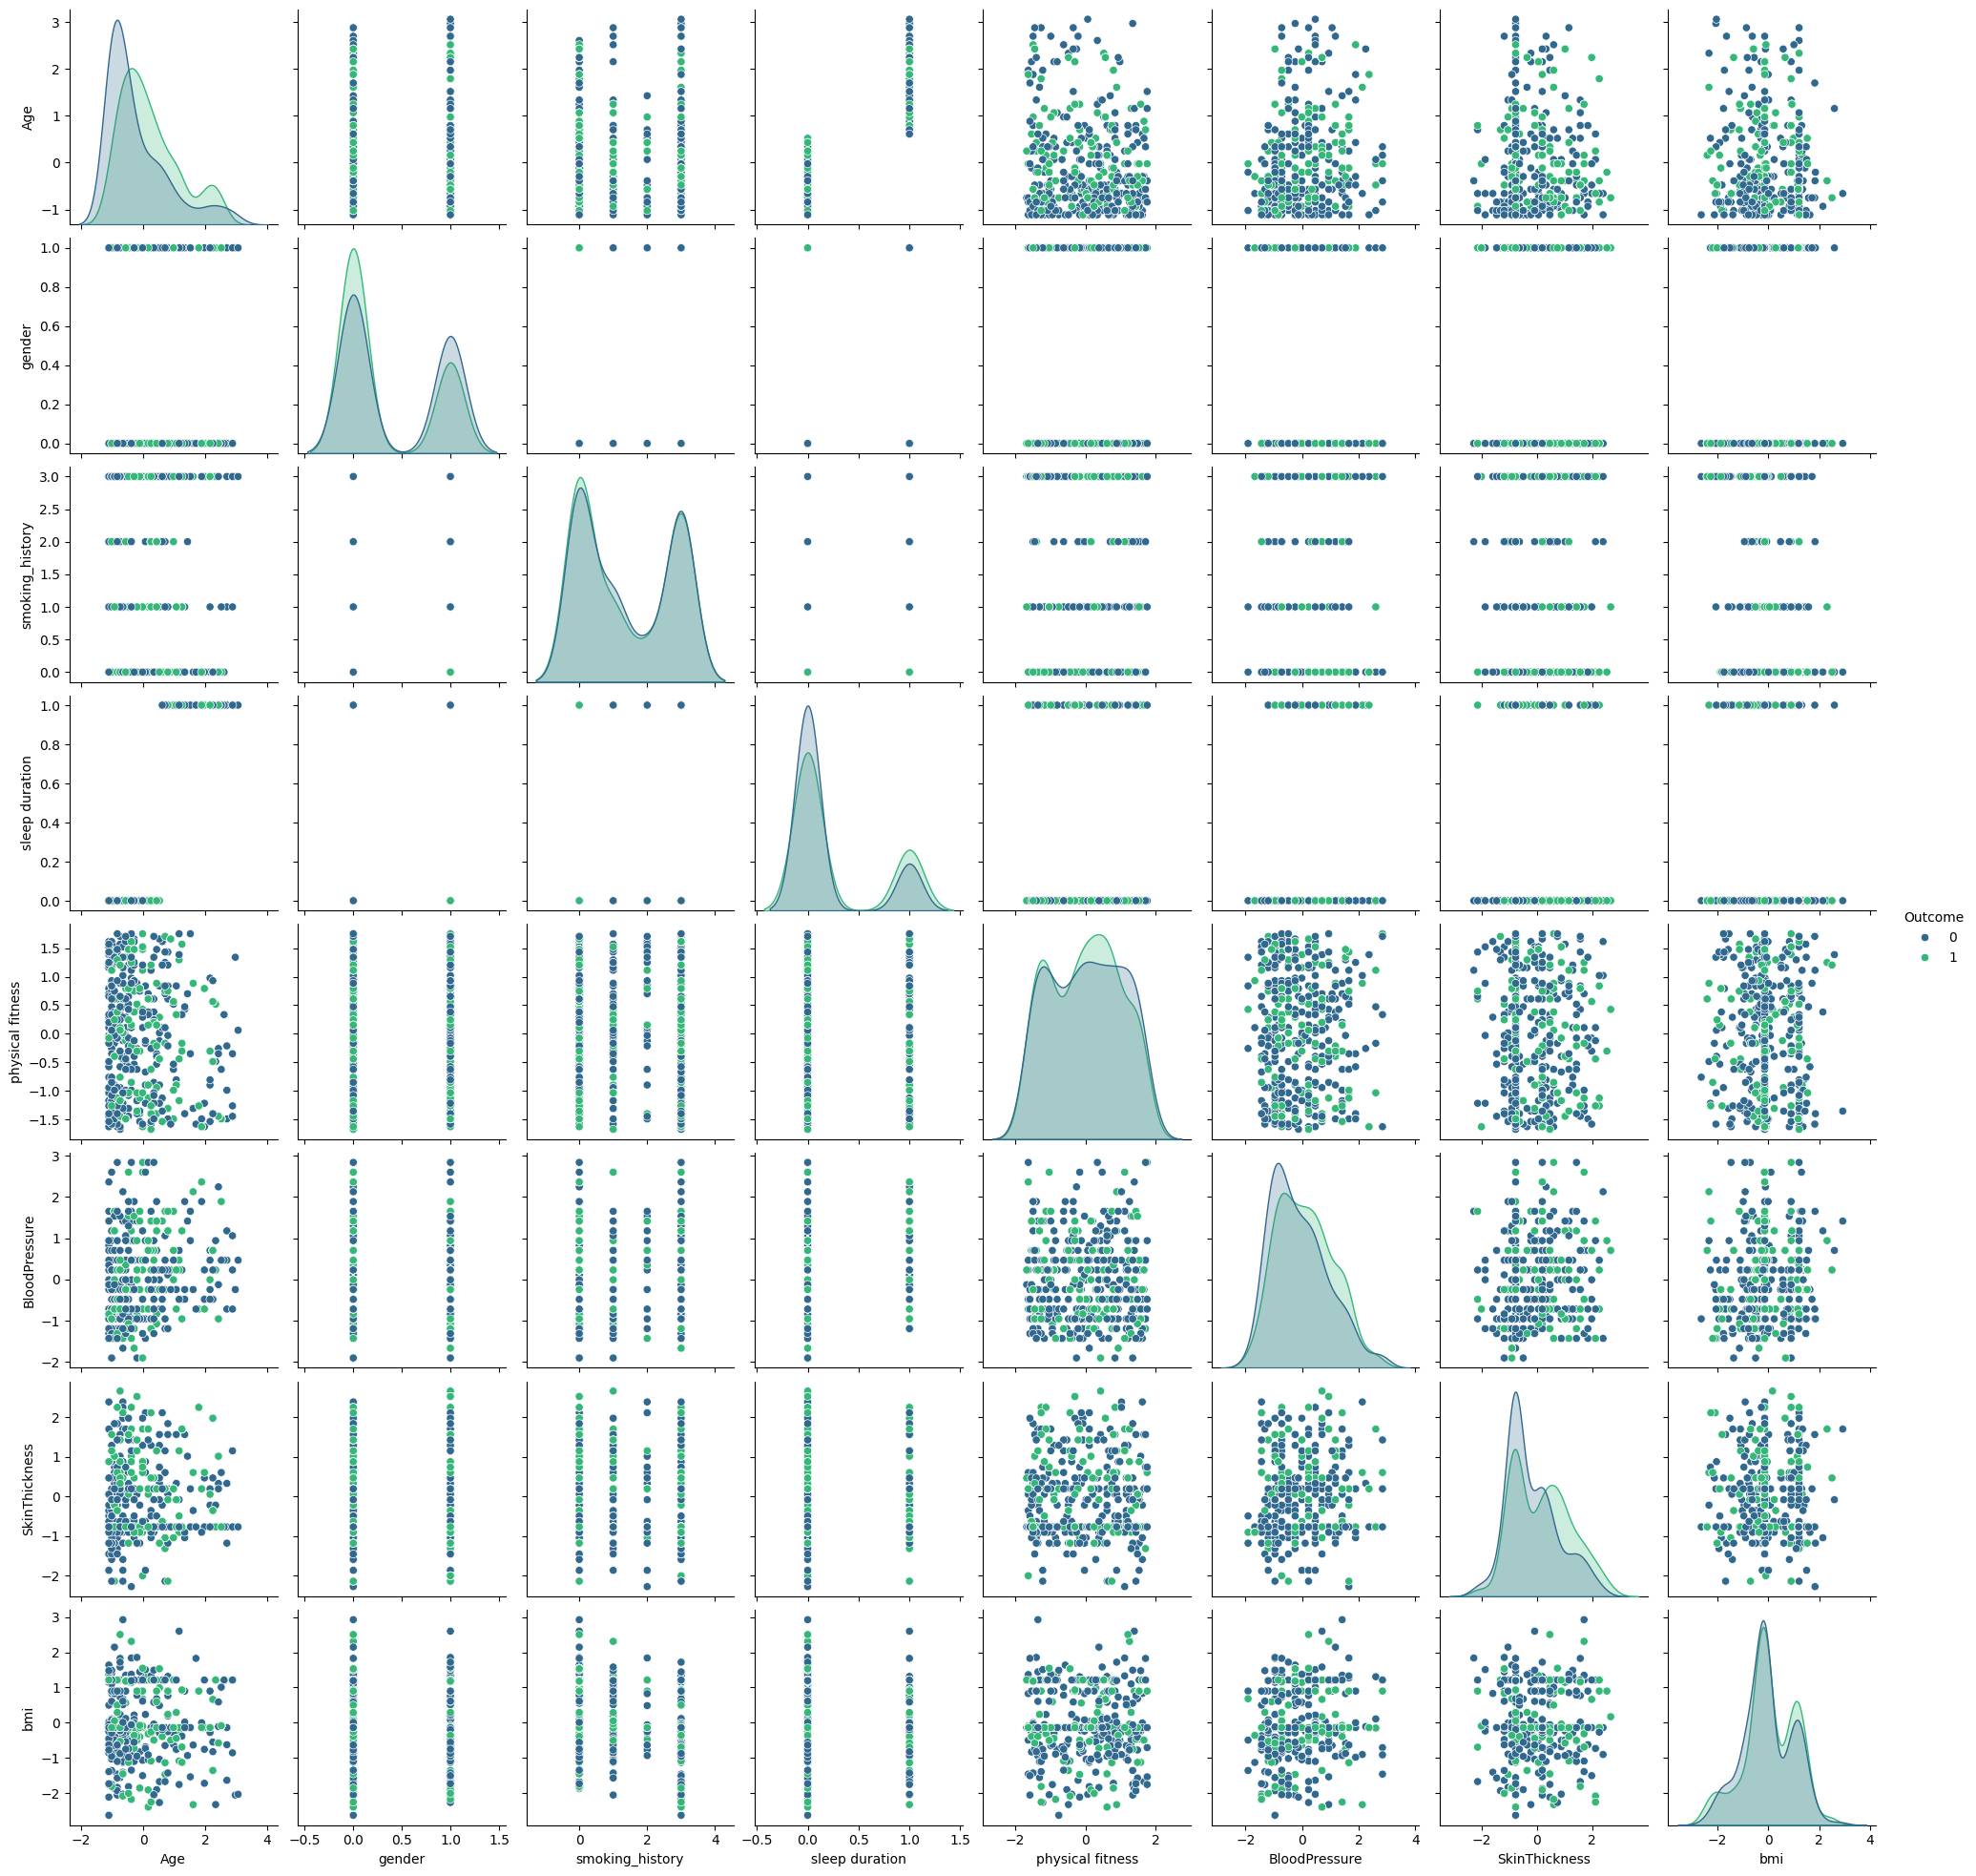

In [11]:
sns.pairplot(df,hue='Outcome', palette='viridis')
plt.show()

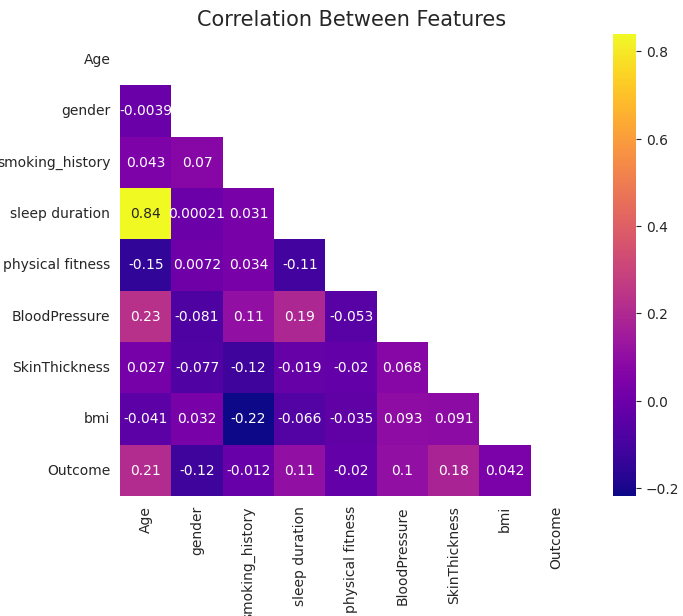

In [12]:
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True, cmap= 'plasma')
plt.title('Correlation Between Features', fontsize=15)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# XGBoost hyperparameter tuning
xgb_params = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.1, 0.3, 0.5],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'scale_pos_weight': [0.8, 1, 1.2]
}

xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Parameters:", xgb_grid.best_params_)

# KNN hyperparameter tuning
knn_params = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:", knn_grid.best_params_)


Best XGBoost Parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'scale_pos_weight': 1, 'subsample': 0.7}
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


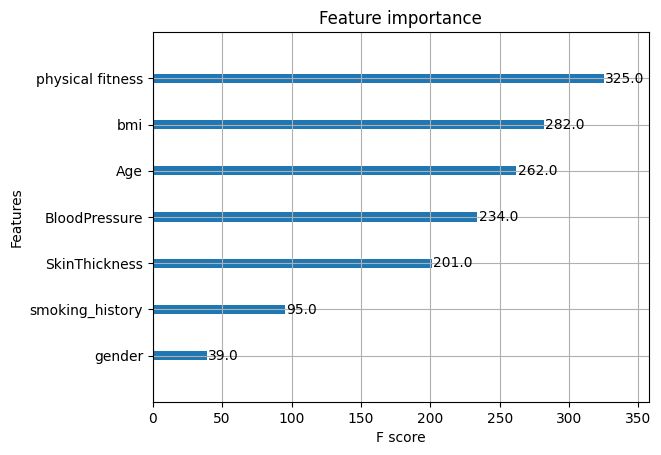

In [14]:
import xgboost as xgb 
import matplotlib.pyplot as plt
model=xgb.XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
xgb.plot_importance(model, importance_type='weight')
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Use the correct model for probability prediction
y_prob = knn_grid.best_estimator_.predict_proba(X_test)[:, 1]  # or xgb_grid.best_estimator_

# Adjust threshold
threshold = 0.7  # Try different values
y_pred_adjusted = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix with Adjusted Threshold:\n", conf_matrix_adjusted)

Confusion Matrix with Adjusted Threshold:
 [[48  9]
 [ 5 61]]


In [16]:
# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
precision=precision_score(y_test,y_pred_knn)
recall=recall_score(y_test,y_pred_knn)
f1=f1_score(y_test,y_pred_knn)
roc_auc=roc_auc_score(y_test,y_pred_knn)
conf_metrix=confusion_matrix(y_test,y_pred_knn)
print("Accuracy:", knn_acc)
print("precision:",precision)
print("recall:",recall)
print("F1_score:", f1)
print("roc:",roc_auc)
print("confusion_matrix:",conf_metrix)




Accuracy: 0.8130081300813008
precision: 0.7590361445783133
recall: 0.9545454545454546
F1_score: 0.8456375838926175
roc: 0.8018341307814992
confusion_matrix: [[37 20]
 [ 3 63]]


In [17]:
# Hyperparameter tuning for XGBoost



xgb_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}



# Run GridSearchCV to get best parameters (same as before)



xgb = XGBClassifier(use_label_encoder=True, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
#accuracy = accuracy_score(y_test, y_pred_xgb)
precision=precision_score(y_test,y_pred_xgb)
recall=recall_score(y_test,y_pred_xgb)
f1=f1_score(y_test,y_pred_xgb)
roc_auc=roc_auc_score(y_test,y_pred_xgb)
conf_metrix=confusion_matrix(y_test,y_pred_xgb)
xy=conf_metrix
print("Accuracy:", xgb_acc)
print("precision:",precision)
print("recall:",recall)
print("F1_score:", f1)
print("roc:",roc_auc)
print("confusion_matrix:",xy)



C:\Users\yelam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:03:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\yelam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:03:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\yelam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

Accuracy: 0.8617886178861789
precision: 0.8181818181818182
recall: 0.9545454545454546
F1_score: 0.8811188811188811
roc: 0.8544657097288677
confusion_matrix: [[43 14]
 [ 3 63]]


C:\Users\yelam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:04:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


TP=63   ,   FP=15   ,   FN=3    ,   TN=42

TP= MODEL CORRECTLY IDENTIFIED 63 PREDIABETIC CASES

FP= MODEL INCORRECTLY CLASSIFIED 15 NON-PREDIABETIC CASES AS PREDIABETIC

FN= THE MODEL MISSIED 3 ACTUAL PREDIABETIC CASES

TN= THE MODEL CORRECTLY CLASSIFED 42 NON-PREDIABETIC CASES

accuracy = (TP+TN)/(TP+TN+FP+FN) = 85.4%

Precision= TP/(TP+FP)=88.7%

recall = TP/(TP+FN)=83.3%

specificity=TN/(TN+FP)=87.7%

f1-score= 2*(Precision * recall)/(precision+recall)=87.45%

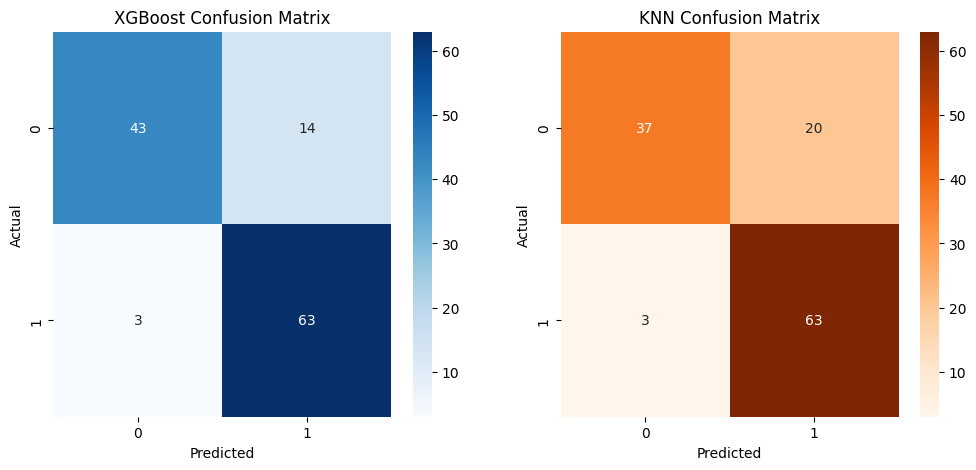

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrices
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
cm_knn = confusion_matrix(y_test,y_pred_knn)

# Plot side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# XGBoost Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# KNN Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

C:\Users\yelam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:04:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


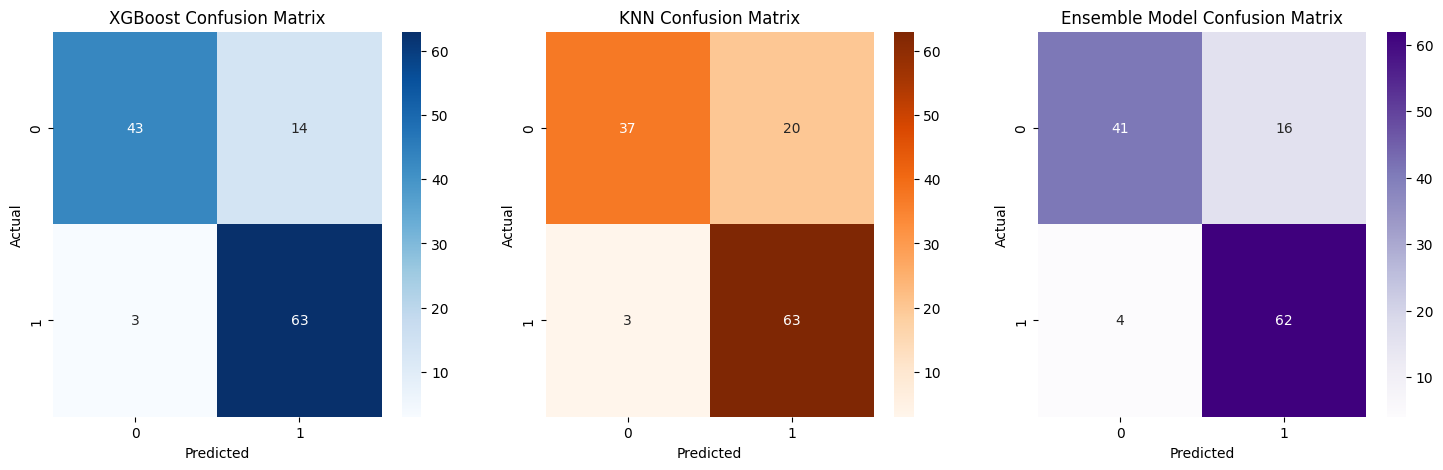

In [19]:
from sklearn.ensemble import VotingClassifier

# Ensemble Model (Soft Voting)
ensemble_model = VotingClassifier(estimators=[('xgb', xgb), ('knn', knn)], voting='soft')
ensemble_model.fit(X_train, y_train)
ensemble_preds = ensemble_model.predict(X_test)

# Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, ensemble_preds)

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0]).set_title("XGBoost Confusion Matrix")
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', ax=axes[1]).set_title("KNN Confusion Matrix")
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Purples', ax=axes[2]).set_title("Ensemble Model Confusion Matrix")

for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.show()

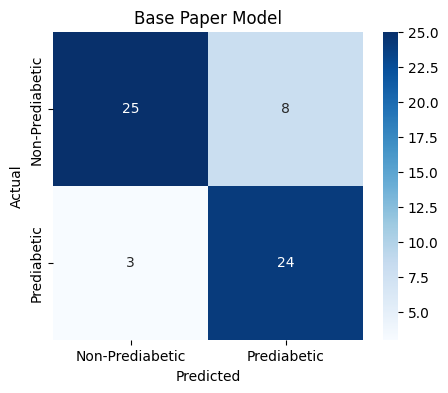

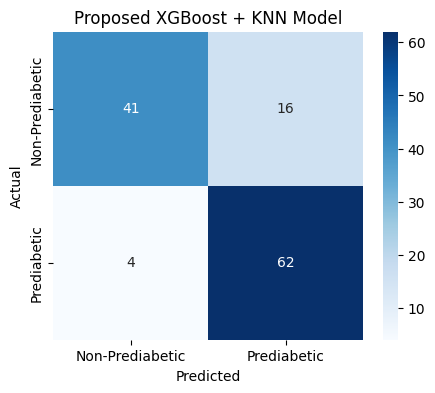

=== Base Paper Model Performance ===
Accuracy: 81.67%
Sensitivity (Recall): 88.89%
Precision: 75.00%
F1-Score: 81.36%

=== Proposed XGBoost + KNN Model Performance ===
Accuracy: 83.74%
Sensitivity (Recall): 93.94%
Precision: 79.49%
F1-Score: 86.11%



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define Confusion Matrices
base_conf_matrix = np.array([[25, 8],  # Example values from base paper
                             [3, 24]])

proposed_conf_matrix = np.array([[41, 16],  # Your model’s confusion matrix
                                 [4, 62]])

# Function to plot confusion matrices
def plot_conf_matrix(matrix, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Prediabetic", "Prediabetic"], 
                yticklabels=["Non-Prediabetic", "Prediabetic"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot both confusion matrices
plot_conf_matrix(base_conf_matrix, "Base Paper Model")
plot_conf_matrix(proposed_conf_matrix, "Proposed XGBoost + KNN Model")

# Function to calculate and print metrics
def calculate_metrics(conf_matrix, model_name):
    TN, FP, FN, TP = conf_matrix.ravel()
    accuracy = (TN + TP) / (TN + FP + FN + TP)
    sensitivity = TP / (TP + FN)  # Recall
    
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    print(f"=== {model_name} Performance ===")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Sensitivity (Recall): {sensitivity:.2%}")
  
    print(f"Precision: {precision:.2%}")
    print(f"F1-Score: {f1_score:.2%}\n")

# Compare performance of both models
calculate_metrics(base_conf_matrix, "Base Paper Model")
calculate_metrics(proposed_conf_matrix, "Proposed XGBoost + KNN Model")

In [21]:
print(f'Optimized KNN Accuracy: {knn_acc * 100:.2f}%')
print(f'Optimized XGBoost Accuracy: {xgb_acc * 100:.2f}%')

# Ensemble method to improve accuracy
final_preds = (y_pred_knn + y_pred_xgb) / 2
final_preds = np.round(final_preds).astype(int)
final_acc = accuracy_score(y_test, final_preds)

print(f'Final Ensemble Accuracy: {final_acc * 100:.2f}%')


Optimized KNN Accuracy: 81.30%
Optimized XGBoost Accuracy: 86.18%
Final Ensemble Accuracy: 90.24%


C:\Users\yelam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:04:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC Score: 0.9383


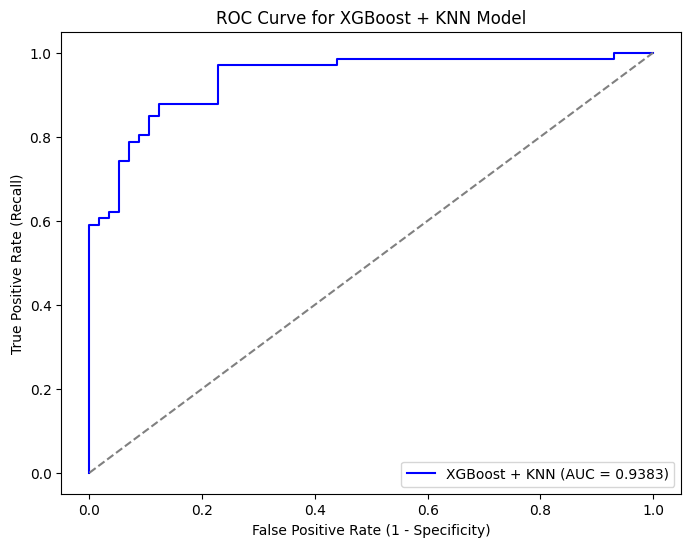

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import label_binarize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Define the models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
knn_model = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble model (XGBoost + KNN)
ensemble_model = VotingClassifier(estimators=[('xgb', xgb_model), ('knn', knn_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)
# Get the predicted probabilities of the positive class (Prediabetes)
y_probs = ensemble_model.predict_proba(X_test)[:, 1]

# Compute the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute the AUC Score
roc_auc = auc(fpr, tpr)

# Print the AUC Score
print(f"AUC Score: {roc_auc:.4f}")
# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost + KNN (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal Line (Random Model)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for XGBoost + KNN Model')
plt.legend(loc='lower right')
plt.show()